**Inteligência Artificial e Computacional**

Prof. Miguel Bozer da Silva - profmiguel.silva@fiap.com.br


---




In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Regressão Linear (Conceitos)


A Regressão Linear será o modelo que iremos utilizar para fazer a previsão do valor do seguro de vida dos dados que recebemos anteriormente. Entretanto, antes disso, vamos ver o que seria esse modelo.

De maneira geral a regressão linear é utilizada para fazer uma predição de uma saída a partir de uma soma dos produtos da entrada de dados por um conjunto de pesos mais uma termo que chamamos de *bias*. A equação a seguir ilustra a regressão linear:

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$

Onde:

*   $\hat{y}$ é a predição feita pelo modelo;
*   $n$ é o número de features;
*   $x_{i}$ é a i-ésima valor da feature de entrada
*   $\theta_{j}$ é o j-ésimo parâmetro a ser aprendido do modelo



Para o caso de termos apenas um valor de feature a imagem a seguir ilustra o modelo de regressão linear:


Vamos criar os nossos dados para fazermos um exemplo de regressão:
<center>
<img src="https://miro.medium.com/max/628/1*GnoMPH4FsH6CTzqCmAj6bA.png" width="500">

Vamos iniciar criando mais uma vez o conjunto de dados com a função $f(x)= 3x_{1} +4 + \varepsilon_{i}$, onde $\varepsilon_{i}$ sendo um erro aleatório:

In [ ]:
import numpy as np

X_ex = 2*np.random.rand(100,1)
y_ex = 3*X_ex + 4 + np.random.randn(100,1)

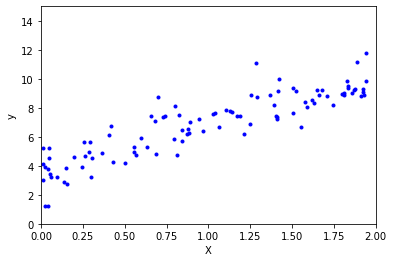

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_ex, y_ex, "b.")
plt.axis([0,2,0,15])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()
modelo.fit(X_ex,y_ex)
modelo.intercept_, modelo.coef_

(array([3.71466314]), array([[3.18380835]]))

In [ ]:
y_pred = modelo.predict(X_ex)

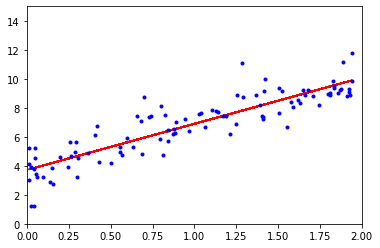

In [ ]:
plt.plot(X_ex,y_pred,"r-")
plt.plot(X_ex,y_ex,"b.")
plt.axis([0,2,0,15])
plt.show()

## Recebendo os dados

Para receber os dados podemos fazer o upload do mesmo no Google Drive:

In [ ]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '17rC5lOWj89_K5_ALNgMzaA_wfck3Up6X'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

0.0 B Done.


## Analisando os nossos dados

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Temos 6 colunas distintas nesse dataset:

*   sex: sexo da pessoa *(0: masculino; 1: feminino);*
*   bmi: Indice de massa corporal *(valor contínuo)*
*   children: Número de filhos *(valor discreto)*
*   smoker: Fumante *(0: não fuma; 1: fumante)*
*   region: Diferentes regiões onde a pessoa mora (categorizado em 0; 1; 2; 3)
*   charges: Valor do seguro de vida *(valor contínuo)*

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [ ]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Analise Estatística dos Dados

In [ ]:
dados.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [ ]:
dados['sex'].value_counts()

1    177
0    171
Name: sex, dtype: int64

In [ ]:
dados['smoker'].value_counts()

0    267
1     81
Name: smoker, dtype: int64

In [ ]:
dados['region'].value_counts()

2    95
0    86
1    85
3    82
Name: region, dtype: int64

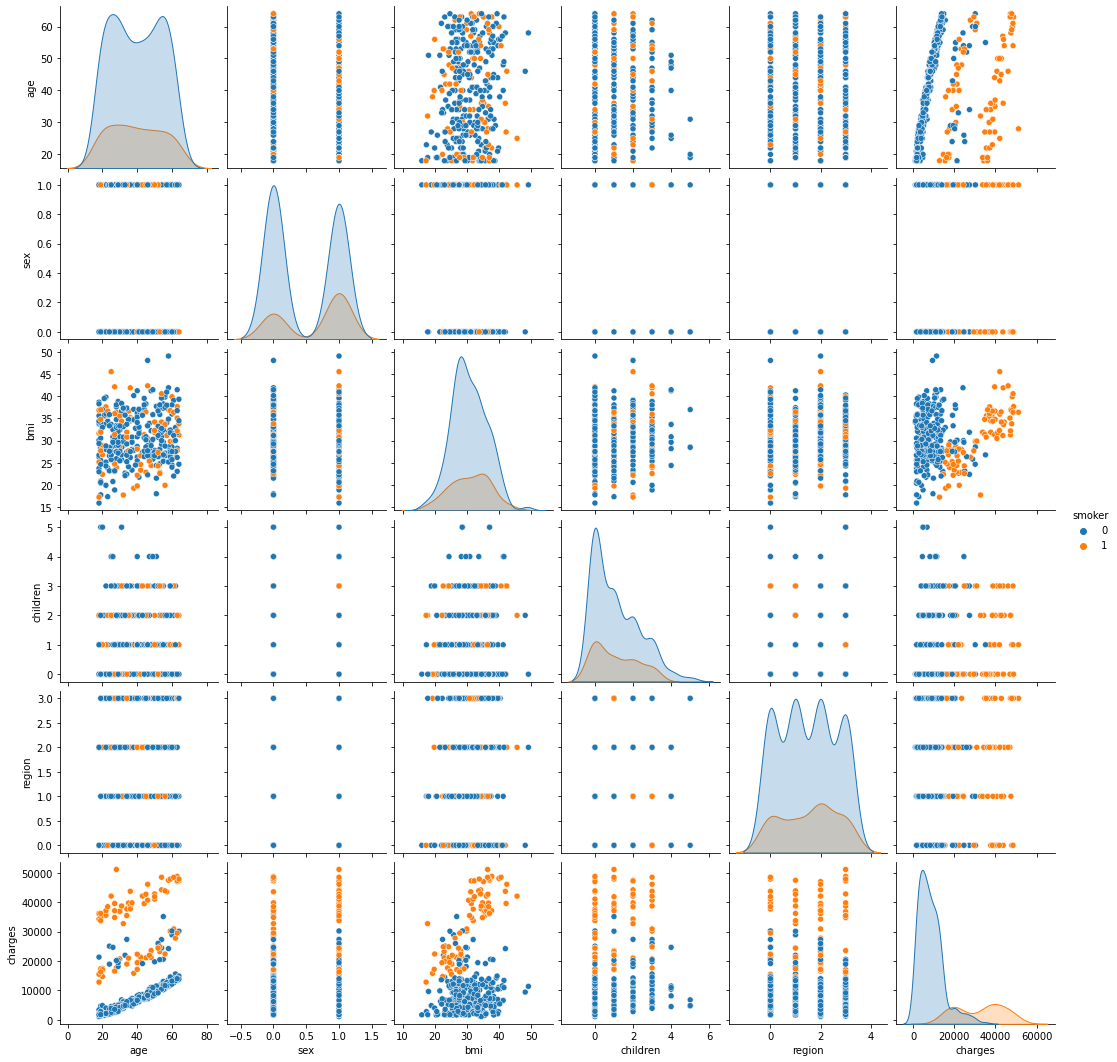

In [ ]:
import seaborn as sns
sns.pairplot(data=dados, hue="smoker")

## Aprendizado Supervisionado

In [ ]:
from sklearn.model_selection import train_test_split

## Divisão dos conjuntos de dados

In [ ]:
X = dados.drop(columns = ['charges'])
y = dados['charges']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42
                                                    )

# Realizando o treinamento e checando as métricas

## Regressão Linear exemplo Valores do Seguro de Vida

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_RL = model.predict(X_test)

In [ ]:
y_pred_RL

## Métricas de Desempenho
Várias são as métricas que podemos usar para avaliar um modelo de regressão. Aqui vamos conversar sobre as 3 mais comuns:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza mais erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa.

$MSE = \frac{1}{m}\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^{2}$

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

$MAE = \frac{1}{m}\sum^{m}_{i=1}|\hat{y}^{(i)}-y^{(i)}|$

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

$R^{2} = 1- \frac{1}{m}\frac{\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum^{m}_{i=1}(y^{(i)}-\bar{y}^{(i)})^{2}}$

## Outros modelos de regressão

### Árvores de Decisão para regressão:

In [ ]:
from sklearn.tree import DecisionTreeRegressor


### Random Forest para regressão:

In [ ]:
from sklearn.ensemble import RandomForestRegressor


### Gradient Boosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Referencia Bibliográfica:



GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopol: O’reilly Media, 2017